In [1]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt

In [99]:
def show_img(img, label=None):
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]), plt.title(label)
    plt.show()

In [100]:
img = cv2.imread('sunset_pereyaslav.jpg')
img = img[:, :, [2, 1, 0]]

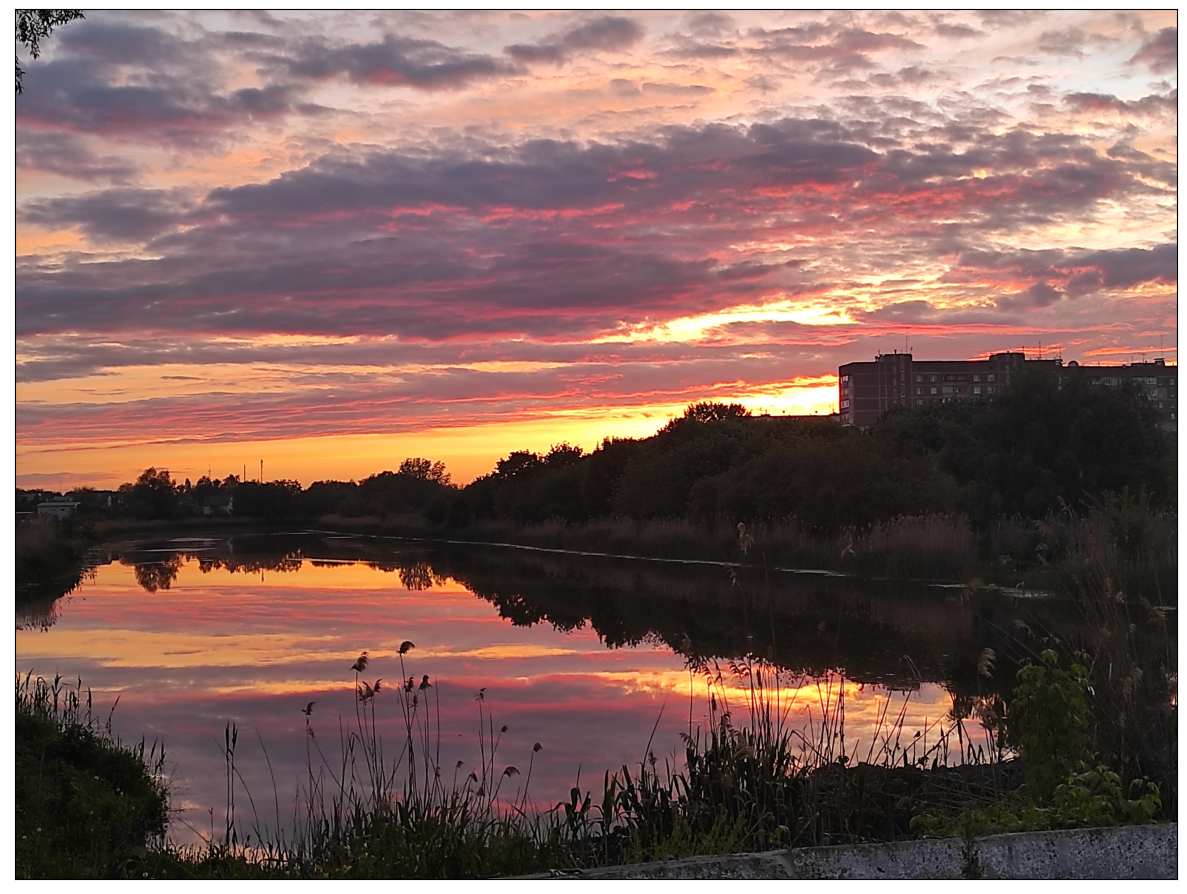

In [101]:
show_img(img)

In [102]:
img2 = cv2.convertScaleAbs(img, alpha=1, beta=30) # changing contrast and brightness

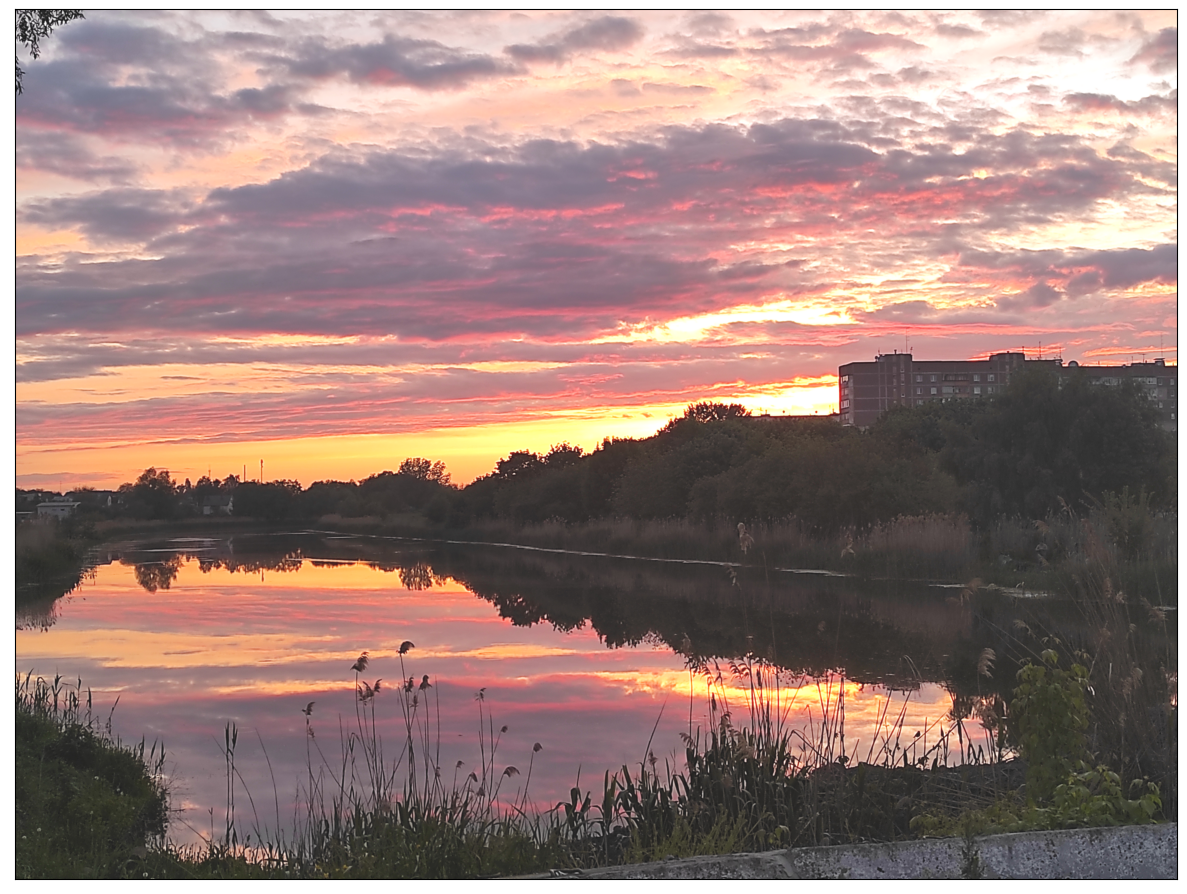

In [103]:
show_img(img2) 

In [113]:
def quantize_kmeans(img, pic_name, n_clusters=8, origin_label=None, quantized_label=None):
    pixels = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pixels)
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    quantized_pixels = np.uint8(np.around(quantized_pixels))
    quantized_img = quantized_pixels.reshape(img.shape)
    show_img(img, label=origin_label)
    show_img(quantized_img, label=quantized_label)
    cv2.imwrite(pic_name, cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB))

In [107]:
pixels = img.reshape((-1, 3))

In [108]:
kmeans = KMeans(n_clusters=16, random_state=0).fit(pixels)
quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]

D:\Python_and_DS\Startup_IT_Academy\PDS3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
quantized_pixels = np.uint8(np.around(quantized_pixels))

In [110]:
quantized_img = quantized_pixels.reshape(img.shape)

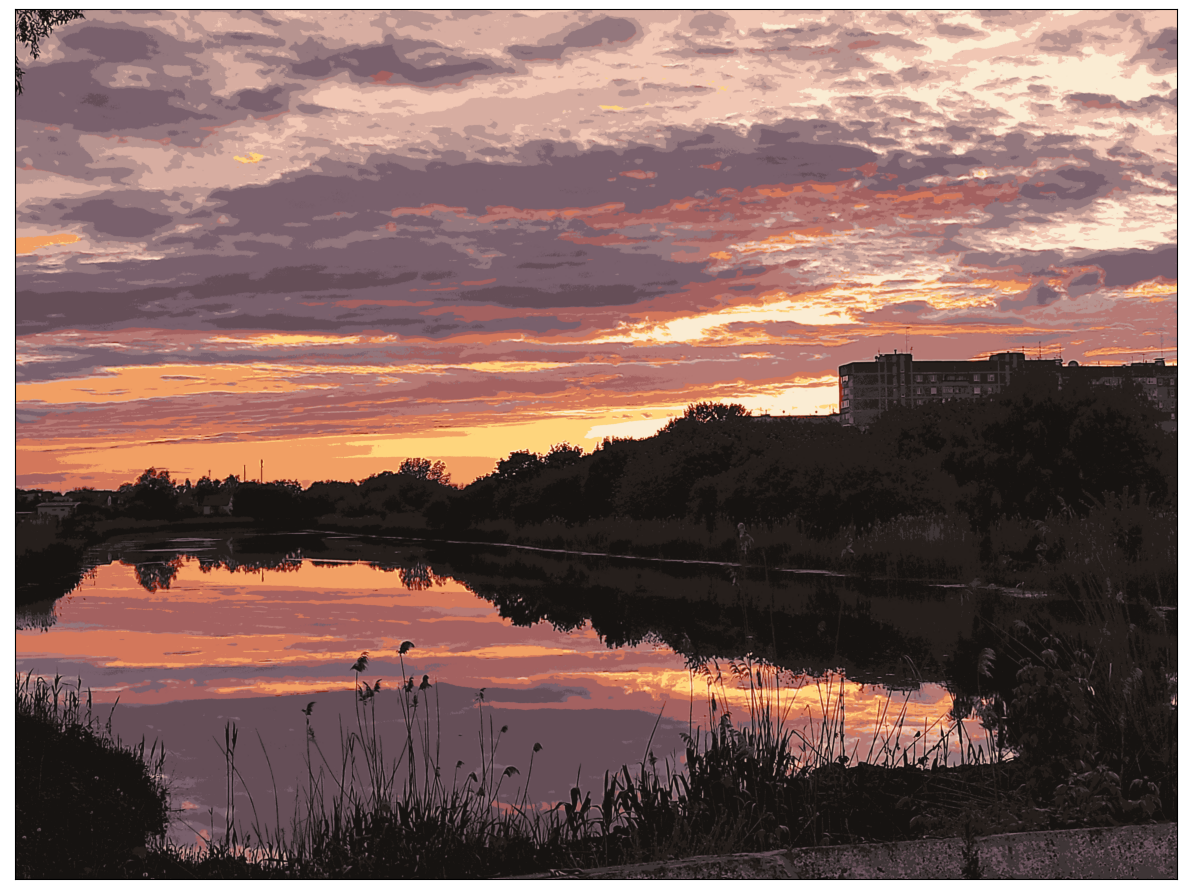

In [111]:
show_img(quantized_img)

In [86]:
cv2.imwrite('quantized_img_pereyaslav.jpg', cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB))

True

D:\Python_and_DS\Startup_IT_Academy\PDS3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


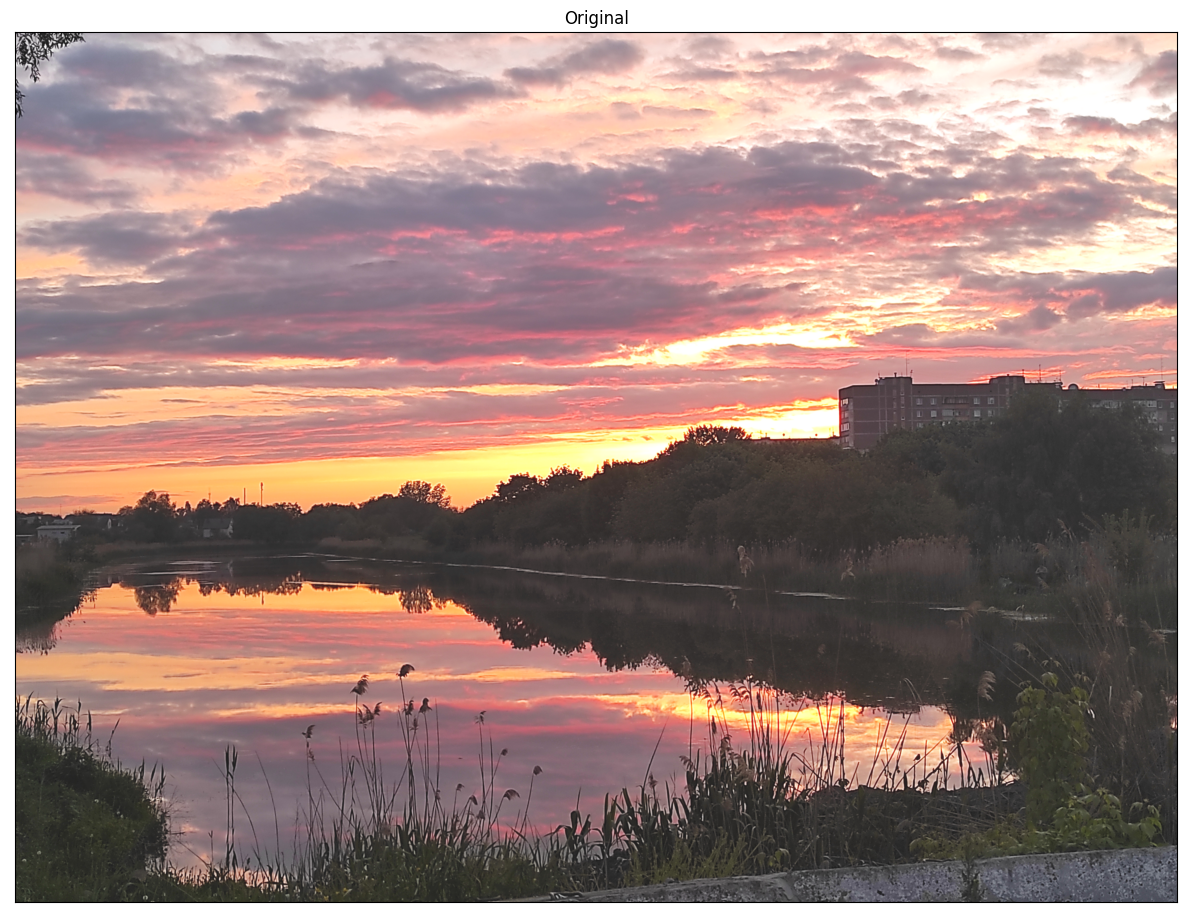

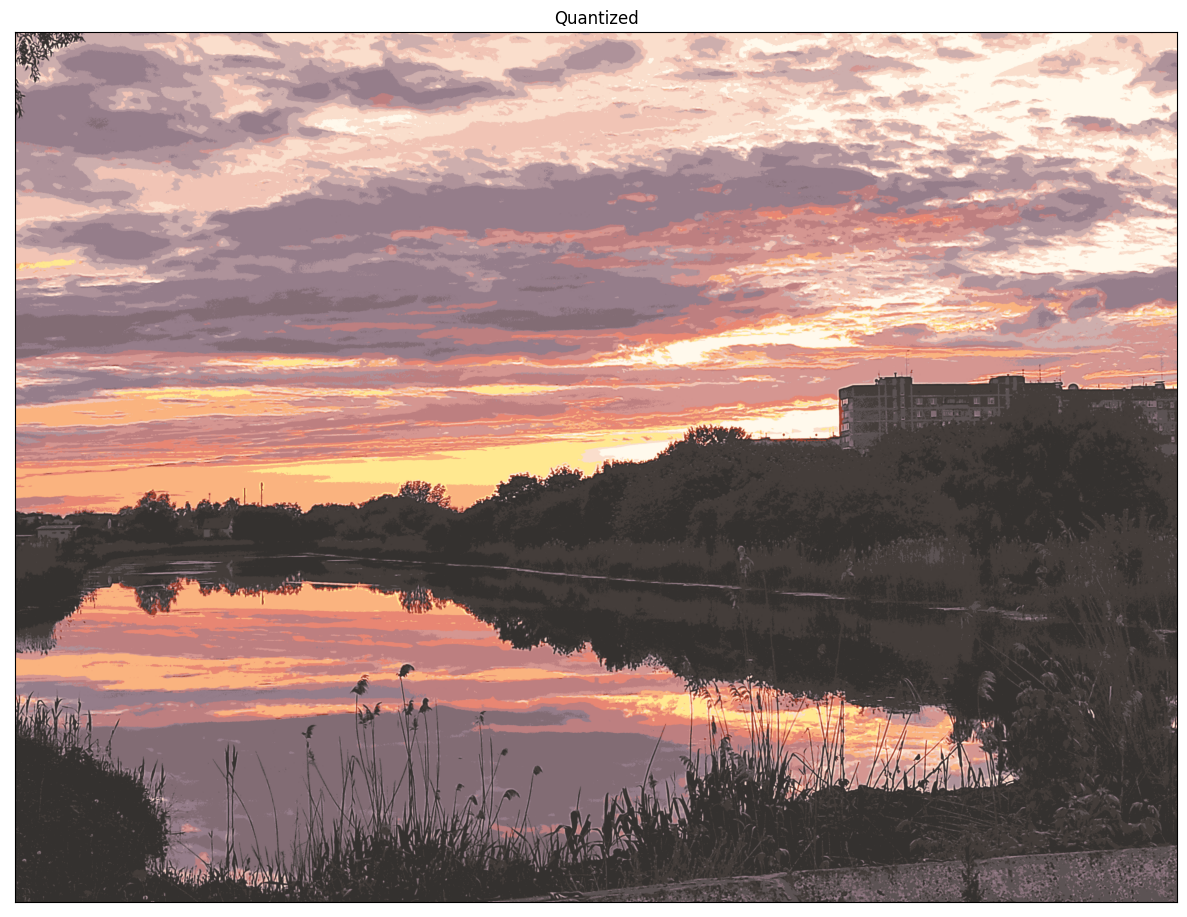

In [114]:
quantize_kmeans(img2, 'quantized_img_pereyaslav_alpha-1_beta-30_16_cluster.jpg', 16, 'Original', 'Quantized')